## Analyzing Investment Returns with Monte Carlo Simulations

## The Problem

You have \$1,000 now and need to pay \$1,050 in one year. You have available to you two assets: a risk free asset that returns 3%, and a stock that returns 10% with a 20% standard deviation. How much should you invest in the two assets to maximize your probability of having at least \$1,050 in one year?

## Portfolio Returns
We need to determine the returns on the portfolio. It matters what weights we have invested in each of the assets, as well as each of the asset's returns.

This is just a one period model, so the portfolio return is  𝑟𝑝=𝑟𝑟𝑓𝑤𝑟𝑓+𝑟𝑠𝑤𝑠

This can be simplified even further. There are only two assets, and we will be fully invested, so  𝑤𝑟𝑓+𝑤𝑠=1 , therefore  𝑤𝑟𝑓=1−𝑤𝑠  and we can just eliminate the  𝑤𝑟𝑓 , yielding:

𝑟𝑝=𝑟𝑟𝑓(1−𝑤𝑠)+𝑟𝑠𝑤𝑠

In [3]:
stock_ret = 0.1
rf = 0.03
stock_weight = 0.5
portfolio_initial_value = 1000

portfolio_ret = rf * (1 - stock_weight) + stock_ret * stock_weight
portfolio_ret
portfolio_end_value = portfolio_initial_value * (1 + portfolio_ret)
portfolio_end_value

1065.0

Make this as a function

In [4]:
def port_end_value(stock_ret=0.1, rf=0.03, stock_weight=0.5, portfolio_initial_value=1000):
    portfolio_ret = rf * (1 - stock_weight) + stock_ret * stock_weight
    portfolio_end_value = portfolio_initial_value * (1 + portfolio_ret)
    return portfolio_end_value

port_end_value()

1065.0

try with other datas

In [6]:
port_end_value(0.05, 0.03, 0.5, 1000)

1040.0

## 1st Summary:

if we earn 10% on the stock and invest 50% in it, we will have enough money. We also know if it returns only 5%, it's not going to be enough to meet our required $1,050. But we don't know anything about the probability of having enough money.

To run a Monte Carlo simulation, all we do is assign distributions as necessary to any inputs, then run the model a bunch of times, drawing inputs from the distributions, passing them into the model, and collecting the outputs.

So here, we are only concerned with assigning the stock return to a distribution. We will not vary the risk free rate as it has a standard deviation of zero, so it would always be the same value anyway. We will not vary the weight as that is a decision variable. We will not vary the inital portfolio value as it shouldn't change.

In [9]:
import random
stock_mean = 0.1
stock_std = 0.2

random.normalvariate(stock_mean, stock_std)

0.035378662410661274

In [10]:
stock_ret=random.normalvariate(stock_mean, stock_std)
print(f'running with stock return {stock_ret:.1%}')
port_end_value(stock_ret)

running with stock return 16.8%


1099.0238450045392

## Collect the Outputs
All we need to do here is run the above steps in a loop, appending the result to a list each time we run the model. This is especially simple because we only have one output from the model. If you have multiple outputs from a single run of your model, you will have to use some other data structure, such as multiple lists, a list of lists, a list of dictionaries, or a DataFrame.

In [11]:
n_iter=3
outputs=[]
for i in range(n_iter):
  stock_ret=random.normalvariate(stock_mean, stock_std)
  result=port_end_value(stock_ret)
  outputs.append(result)
outputs

[1016.4757876303468, 1143.6127484615545, 905.5976183932291]

## convert this as a function

In [12]:
def port_end_value_simulations(stock_mean=0.1, stock_std=0.2, stock_weight=0.5, n_iter=1000):
    outputs = []
    for i in range(n_iter):
        stock_ret = random.normalvariate(stock_mean, stock_std)
        result = port_end_value(stock_ret, stock_weight=stock_weight)
        outputs.append(result)
    return outputs

results = port_end_value_simulations()
print(f'There are {len(results)} results. First five:')
results[:5]

There are 1000 results. First five:


[1153.4364209677378,
 1192.6010329361686,
 1003.355526833655,
 1051.9330259450085,
 1077.8977256403878]

## Visualization

<Axes: ylabel='Frequency'>

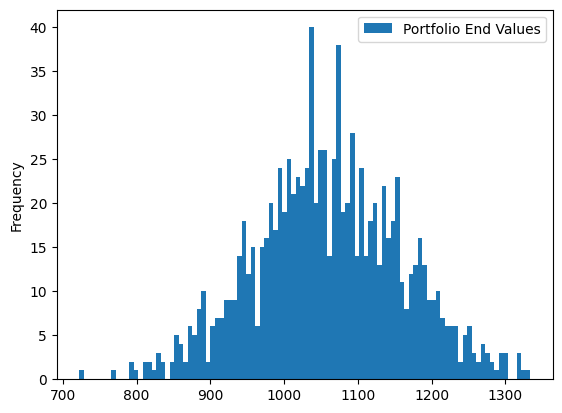

In [13]:
%matplotlib inline
import pandas as pd

df=pd.DataFrame()
df['Portfolio End Values']=results
df.plot.hist(bins=100)

<Axes: ylabel='Density'>

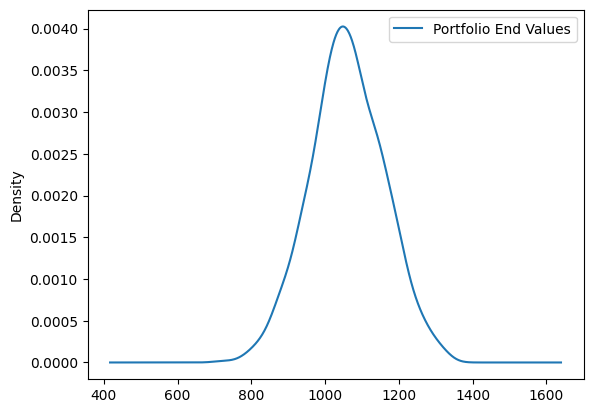

In [14]:
df.plot.kde()

In [15]:
## Probability Outputs

percentiles=[i/20 for i in range(1,20)]


In [16]:
df['Portfolio End Values'].quantile(percentiles)

0.05     890.533762
0.10     932.416798
0.15     955.230057
0.20     977.926980
0.25     994.640184
0.30    1008.794387
0.35    1021.655852
0.40    1035.102672
0.45    1044.198237
0.50    1057.737602
0.55    1071.125919
0.60    1080.976766
0.65    1093.388861
0.70    1111.526530
0.75    1128.387505
0.80    1146.270870
0.85    1163.759279
0.90    1189.307250
0.95    1224.451213
Name: Portfolio End Values, dtype: float64

## Probability of Acheiving Objective
The other kind of output is the probability that we will achieve our objective. Here we want \$1,050. So we want to find the probability we will have at least that much money. We can see from the prior table that the probability of getting a value lower than about \$1,050 is 45%, so then the probability of getting at least \$1,050 would be 1−𝑝 or about 55%. But we want to get to that directly rather than using the table as the tables values might not line up well with our desired value.

There's not a direct pandas function for this. But as having more money still meets the objective, what we want to calculate is basically the percentage of observations that have a value equal to or higher than our desired objective.

In [17]:
(df['Portfolio End Values']>=1050).astype(int).mean()

0.531

In [18]:
df['Portfolio End Values']>=1050

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996     True
997     True
998     True
999    False
Name: Portfolio End Values, Length: 1000, dtype: bool

In [19]:
(df['Portfolio End Values']>=1050).astype(int)

0      1
1      1
2      0
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    0
Name: Portfolio End Values, Length: 1000, dtype: int64

## Putting the Visualization and Probabilities Together

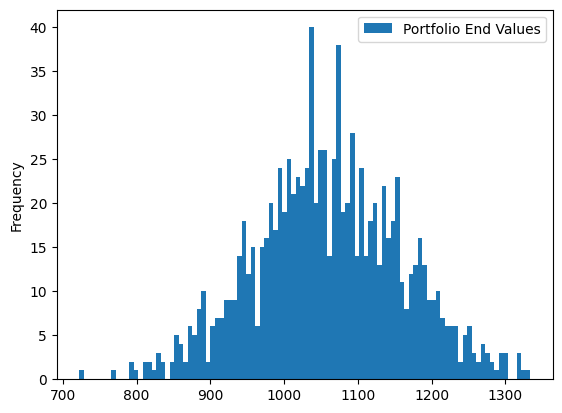

Probability Table
0.05     $890.53
0.10     $932.42
0.15     $955.23
0.20     $977.93
0.25     $994.64
0.30    $1008.79
0.35    $1021.66
0.40    $1035.10
0.45    $1044.20
0.50    $1057.74
0.55    $1071.13
0.60    $1080.98
0.65    $1093.39
0.70    $1111.53
0.75    $1128.39
0.80    $1146.27
0.85    $1163.76
0.90    $1189.31
0.95    $1224.45
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 53.1%



In [20]:
import matplotlib.pyplot as plt

def create_dataframe_from_results(results):
    df = pd.DataFrame()
    df['Portfolio End Values'] = results
    return df


def visualize_results(df):
    df.plot.hist(bins=100)
    plt.show()  # makes plot show right now, which we will need when running this multiple times


def probability_table(df):
    percentiles = [i/20 for i in range(1, 20)]
    return df['Portfolio End Values'].quantile(percentiles)


def probability_of_objective(df, desired_cash=1050):
    return ( df['Portfolio End Values'] >= desired_cash ).astype(int).mean()


def model_outputs(results, desired_cash=1050):
    df = create_dataframe_from_results(results)
    visualize_results(df)
    prob_table = probability_table(df)
    prob_objective = probability_of_objective(df, desired_cash=desired_cash)
    return prob_table, prob_objective


def display_model_summary(results, desired_cash=1050):
    prob_table, prob_objective = model_outputs(results, desired_cash=desired_cash)
    print('Probability Table')
    print(prob_table.apply(lambda x: f'${x:.2f}'))  # a way of formatting a pandas series
    print('')
    print(f'Probability of getting ${desired_cash:,.0f} in cash: {prob_objective:.1%}')
    print('')


display_model_summary(results)

In [21]:
weights=[i/10 for i in range(1,10)]
weights

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [26]:
from IPython.display import HTML, display

def display_header(header):
    return display(HTML(f'<h2>{header}</h2>'))

display_header('Another Title')

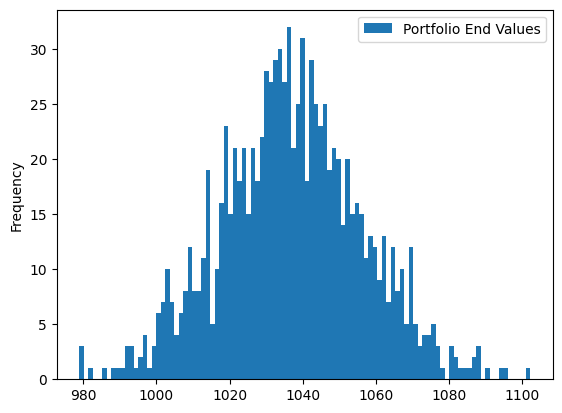

Probability Table
0.05    $1003.92
0.10    $1012.19
0.15    $1017.71
0.20    $1020.85
0.25    $1024.00
0.30    $1027.34
0.35    $1030.04
0.40    $1032.24
0.45    $1034.40
0.50    $1036.54
0.55    $1039.09
0.60    $1041.52
0.65    $1043.82
0.70    $1046.58
0.75    $1049.51
0.80    $1052.89
0.85    $1056.84
0.90    $1062.17
0.95    $1069.61
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 24.3%



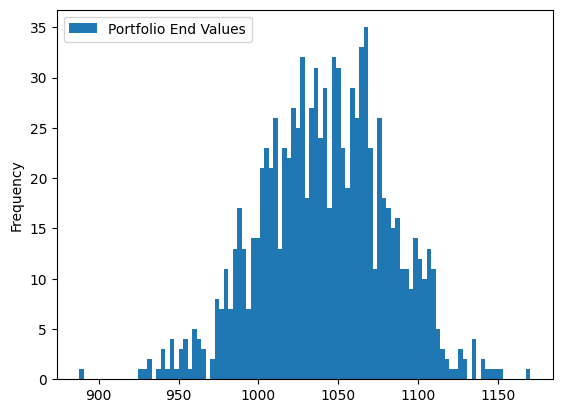

Probability Table
0.05     $977.78
0.10     $989.92
0.15    $1001.22
0.20    $1007.00
0.25    $1014.67
0.30    $1020.92
0.35    $1026.28
0.40    $1031.99
0.45    $1036.89
0.50    $1042.48
0.55    $1047.69
0.60    $1052.75
0.65    $1059.03
0.70    $1064.15
0.75    $1068.03
0.80    $1075.00
0.85    $1082.69
0.90    $1092.84
0.95    $1105.91
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 43.0%



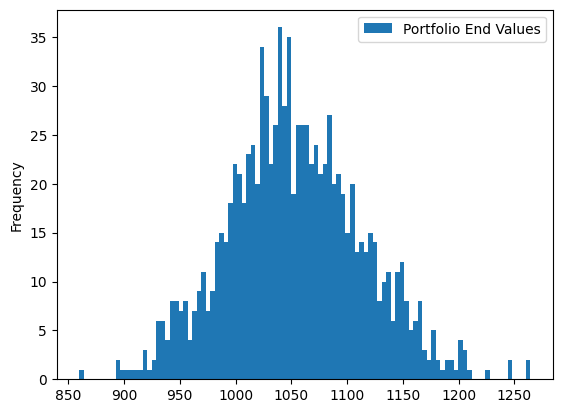

Probability Table
0.05     $951.72
0.10     $977.80
0.15     $993.25
0.20    $1004.34
0.25    $1013.21
0.30    $1022.73
0.35    $1028.84
0.40    $1036.80
0.45    $1042.98
0.50    $1048.51
0.55    $1057.78
0.60    $1065.83
0.65    $1074.26
0.70    $1083.17
0.75    $1091.76
0.80    $1103.35
0.85    $1117.40
0.90    $1133.16
0.95    $1154.27
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 49.3%



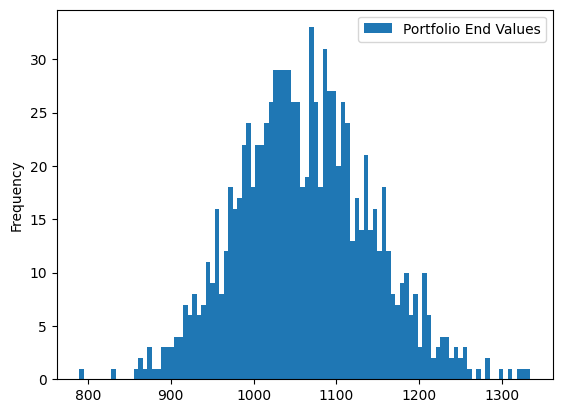

Probability Table
0.05     $934.10
0.10     $960.62
0.15     $978.25
0.20     $993.08
0.25    $1006.32
0.30    $1017.85
0.35    $1028.26
0.40    $1037.54
0.45    $1046.79
0.50    $1058.18
0.55    $1070.71
0.60    $1082.04
0.65    $1091.03
0.70    $1102.58
0.75    $1113.15
0.80    $1129.00
0.85    $1145.57
0.90    $1165.28
0.95    $1198.49
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 53.8%



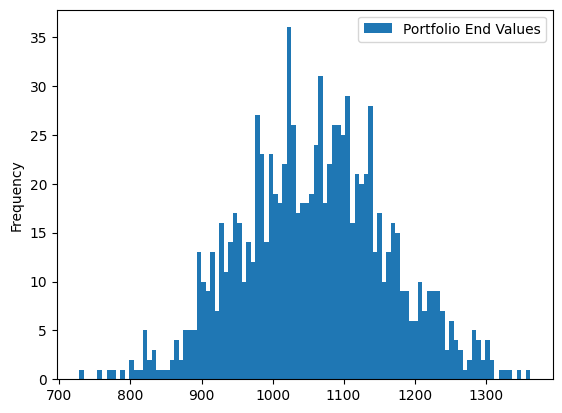

Probability Table
0.05     $895.60
0.10     $925.57
0.15     $948.69
0.20     $971.41
0.25     $986.26
0.30    $1004.37
0.35    $1019.44
0.40    $1029.71
0.45    $1045.52
0.50    $1061.64
0.55    $1074.60
0.60    $1088.05
0.65    $1101.05
0.70    $1113.68
0.75    $1129.96
0.80    $1144.55
0.85    $1167.59
0.90    $1193.39
0.95    $1235.20
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 53.8%



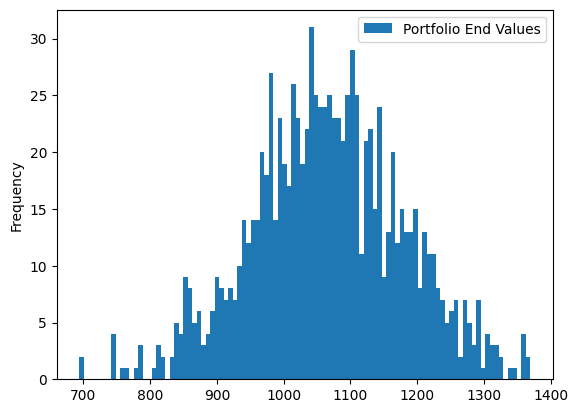

Probability Table
0.05     $866.11
0.10     $923.09
0.15     $953.43
0.20     $974.26
0.25     $990.16
0.30    $1007.98
0.35    $1021.75
0.40    $1038.05
0.45    $1050.87
0.50    $1064.83
0.55    $1077.81
0.60    $1093.69
0.65    $1105.85
0.70    $1123.32
0.75    $1141.78
0.80    $1163.02
0.85    $1185.72
0.90    $1213.95
0.95    $1256.65
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 55.4%



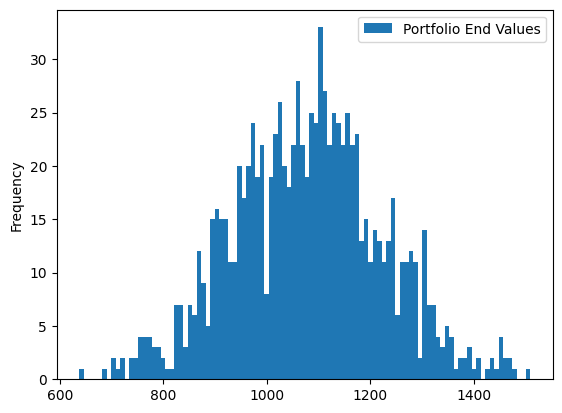

Probability Table
0.05     $847.36
0.10     $898.56
0.15     $926.34
0.20     $957.47
0.25     $976.28
0.30    $1002.70
0.35    $1024.05
0.40    $1043.91
0.45    $1061.05
0.50    $1083.26
0.55    $1100.79
0.60    $1113.45
0.65    $1133.58
0.70    $1151.99
0.75    $1170.74
0.80    $1196.61
0.85    $1232.16
0.90    $1269.43
0.95    $1316.44
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 58.5%



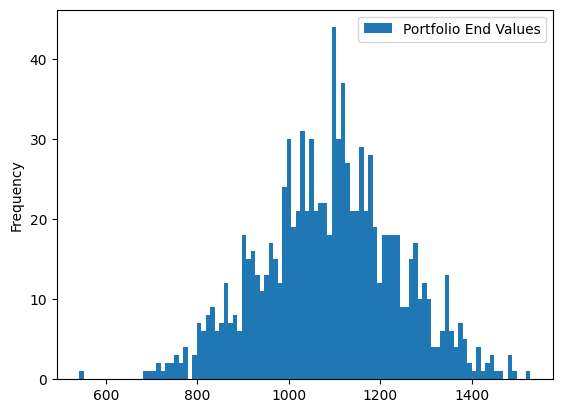

Probability Table
0.05     $836.06
0.10     $898.63
0.15     $927.99
0.20     $965.33
0.25     $995.09
0.30    $1014.96
0.35    $1034.62
0.40    $1053.56
0.45    $1075.57
0.50    $1097.48
0.55    $1110.24
0.60    $1124.49
0.65    $1144.81
0.70    $1164.61
0.75    $1185.55
0.80    $1215.91
0.85    $1242.98
0.90    $1282.16
0.95    $1344.27
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 61.0%



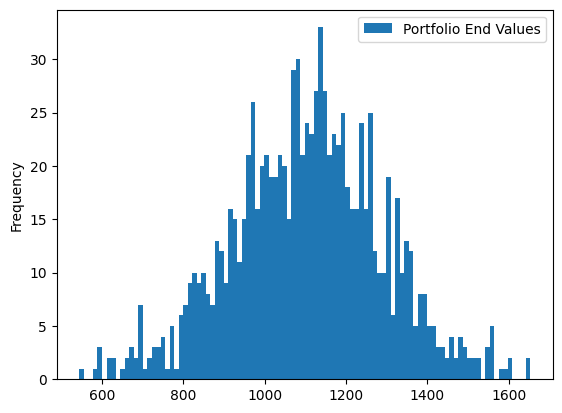

Probability Table
0.05     $800.51
0.10     $860.73
0.15     $914.48
0.20     $952.92
0.25     $978.41
0.30    $1007.33
0.35    $1036.73
0.40    $1065.58
0.45    $1084.73
0.50    $1107.49
0.55    $1130.94
0.60    $1147.66
0.65    $1171.52
0.70    $1197.06
0.75    $1229.70
0.80    $1257.04
0.85    $1295.73
0.90    $1338.99
0.95    $1399.59
Name: Portfolio End Values, dtype: object

Probability of getting $1,050 in cash: 62.7%



In [25]:
for weight in weights:
  display_header(f'Results with {weight:.0%} in the Stock')
  results=port_end_value_simulations(stock_weight=weight)
  display_model_summary(results)

## Conclusions
We got sort of an unintuitive outcome, which we wouldn't have thought about without going through such an exercise. It turns out the the probability of reaching our desired cash starts out to be increasing with the weight in the stock, but with 50% in the stock and higher it is relatively stable. What is mainly changing beyond that point is the extreme outcomes. With a higher weight in the stock, it is more likely to earn more money on the top end, but also to lose more money on the bottom end. So it depends on the manager's risk tolerance which stock weight should be picked, but likely lower than 50% in the stock would be a bad choice due to lower probability of hitting the objective.